## Forecast and Predict Customer Churn in Gym Fitness

#### Project description:

The gym chain Model Fitness is developing a customer interaction strategy based
on analytical data.One of the most common problems gyms and other services face
is customer churn. 
You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.
For a gym, it makes sense to say a customer has left if they don't come for a 
month. Of course, it's possible they're in Cancun and will resume their visits 
when they return, but's that's not a typical case. Usually, if a customer joins,comes a few times, then disappears, they're unlikely to come back.

In order to fight churn, Model Fitness has digitized a number of its customer 
profiles. 

##### Data description
The dataset includes the following fields:
- 'Churn' — the fact of churn for the month in question
 - User data for the preceding month
        - gender
        - Near_Location
        - Partner
        - Promo_friends 
        - Phone
        - Age
        - Lifetime
  - Data from the log of visits and purchases and data on current membership status
        - Contract_period
        - Month_to_end_contract
        - Group_visits
        - Avg_class_frequency_total
        - Avg_class_frequency_current_month
        - Avg_additional_charges_total


#### Steps to take:
- Step 1: Download the data

- Step 2: Carry out exploratory data analysis (EDA) 

    - Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).
    - Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).
    - Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
    - Build a correlation matrix and display it.
  
- Step 3: Build a model to predict user churn 

    - Build a binary classification model for customers where the target feature is the user's leaving next month.
    - Divide the data into train and validation sets using the train_test_split() function.
    - Train the model on the train set with two methods:
            - logistic regression
            - random forest
    - Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?

 
- Step 4:  Create user clusters

- Set aside the column with data on churn and identify object (user) clusters:
    - Standardize the data.
    - Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
    - Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
    - Look at the mean feature values for clusters. Does anything catch your eye?
    - Plot distributions of features for the clusters. Do you notice anything?
    - Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?
    
- Step 5: Come up with conclusions and basic recommendations on working with customers

    - Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention. 
 
#### Goal:
Our goal is to to analyze them and come up with a customer retention strategy.

## Steps followed to complete the project:

In [1]:
!pip install -U seaborn
!pip install matplotlib
!pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 1.2 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


#### Step 1. Open the data file and study the general information

In [3]:
##### Import default libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#import scikitplot as skplt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#read data from file
df = pd.read_csv('/datasets/gym_churn_us.csv')

print(df.head(5))

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  

In [4]:
# changing columns to lowercase to remove capital letters
df.columns = df.columns.str.lower()
display(df)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


##### Conclusion:
We read the data from a CSV file  and loaded into a Dataframe. Then, I changed the columns names to lowercase to make them more consistence.

### Step 2. Carry out exploratory data analysis (EDA)

#### Looking at the dataset to check if there is any missing features.

In [5]:
# Viewing general information of data.
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB
None


In [6]:
## Checking for duplicates
df.duplicated().sum()


0

#### Conclusion:
After viewing the dataset, we found out that the data has no missing and duplicate values in the dataset.

####  Studying the mean values and standard deviation 

In [7]:
df.describe()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Conclusion:
Based on the table above, we can conclude that there are 4000 customers in the dataset. There are about an equal number of male and female customers enrolled in the gym and most customers live or work near the neighborhood where the gym is located.90% of the customers have provided their phone numbers and their gym contract period is about 5 months. The age group of customer that comes to the gym is about 30 years old.
The mean of 'Churn'is 0.27 and the standard deviation is 0.44. Since Churn is either 0 or 1, this means on average, about 27% of customers churn. On average, contracts last for about 5 months. The longest a customer has ever stayed with the gym is 31 months and the shortest is less than a month. On average, the average additional charge is about 146.94  with a standard deviation of about 96.4.

#### Looking at the mean feature values in two groups: for those who left (churn) and for those who stayed

In [8]:
#churn=0 means  staying, churn=1 means leaving
churnData = df.groupby('churn').mean()
display(churnData)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### Conclusion:
Based on the above table, there is not much difference in male and female customers (gender) who churn or not. However, those customers who live near the neighborhood tend to stay with the gym as the mean of those customers who stayed is 0.87.
The mean age of churn customers is about 27 years while the mean age of customers who stayed is about 30 years. This means, younger people are more likely to leave a gym than older people.
The average lifetime of customers who stayed is about 5 months whereas customers who churn is less than a month. Customers who stayed had a higher average additional charge in total which is about 158.45 than those who left which is about 115.08


#### Plotting bar histograms and feature distributions for those who left (churn) and those who stayed.

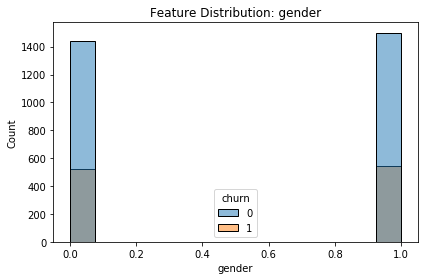

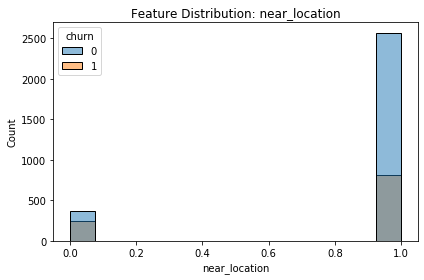

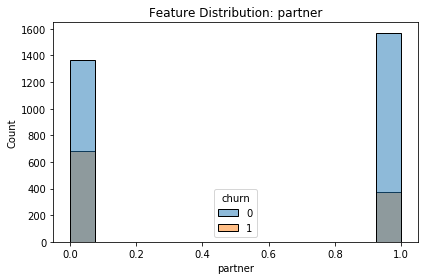

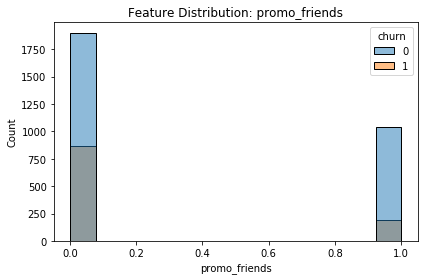

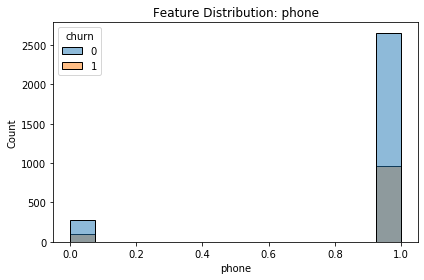

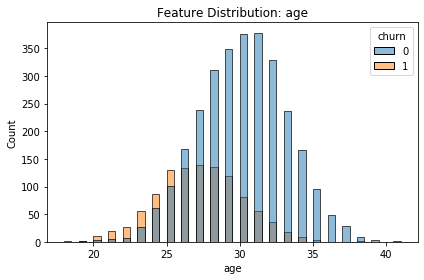

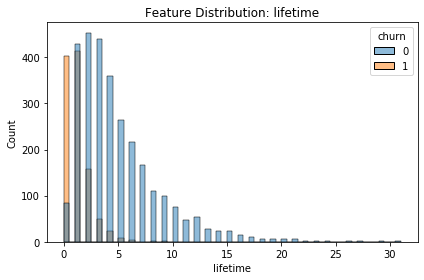

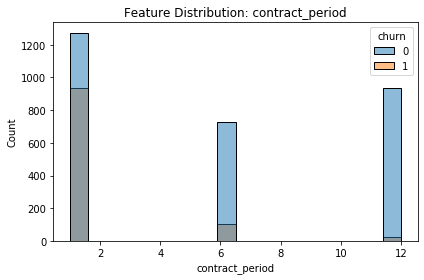

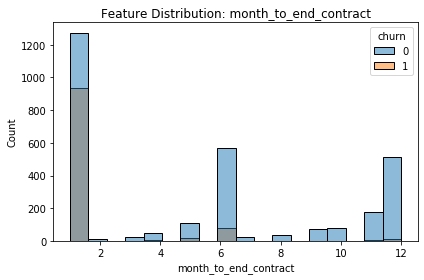

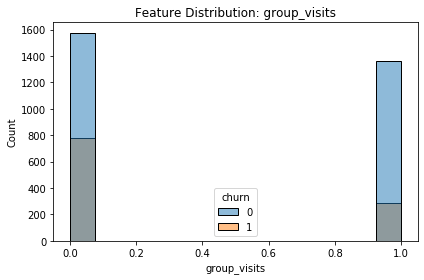

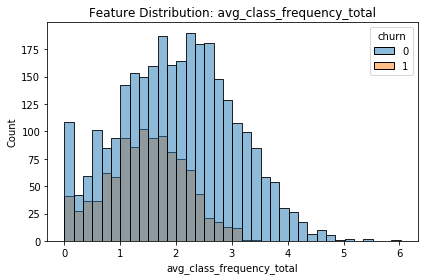

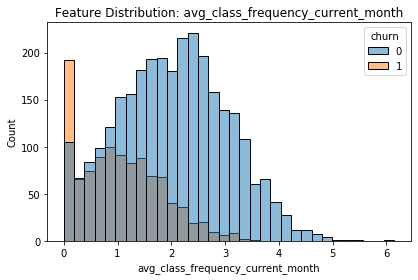

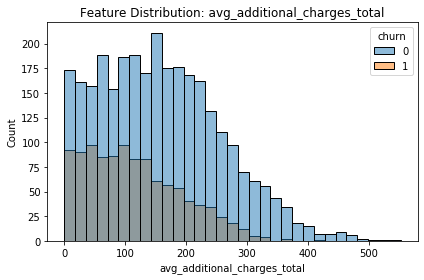

In [10]:
import seaborn as sns
columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone','age','lifetime','contract_period', 'month_to_end_contract','group_visits', 'avg_class_frequency_total', 'avg_class_frequency_current_month','avg_additional_charges_total']

for feature in columns:
    sns.histplot(data=df, x= feature, hue = 'churn')
    plt.title('Feature Distribution: {}'.format(str(feature)))
    plt.tight_layout()
    plt.show() 


#### Conclusion:
Based on gender distribution for left(churn) and stayed, we have almost equal number of population of male and female customers who churn and stayed. Hence, there's no correlation between genders and churning.

On near_location distribution, customers who are lives or works near gym are 5  times higher than who doesn't. Hence, those customers who live closer to the gym stay while those who don't choose to churn gym.

On employee_partner distribution, more than half of the customers are employees of a partner company. About 50% of non partner customers churn. Only about 20% of customers from partner companies churn. 

On promo_friends distribution, Customers who joined the gym without promo friends are more than those who joined via promo friend. However, customers who join gym via promo friends are less likely to churn than those who join without a promo friend. 

On phone distribution, almost all of customers who subscribe to the gym have  phone numbers to get notifications and updates.

On lifetime distribution, most users who churn have been members for less than 3 months.

On month_to_end_contract distribution,more than 80% of customers who sign 1 month contract churn. less than 10% of customers who sign 12 months contract churn.

On age distribution, it shows that customers between the ages of 20 and 25 tended to churn. Younger people are more likely to churn than older people.

On avg_additional_charge distribution, it shows that most users who churn have been members for less than 3 months. However, many users who do not churn fall under 2-5 months of lifetime. 











#### Building a correlation matrix and display it.

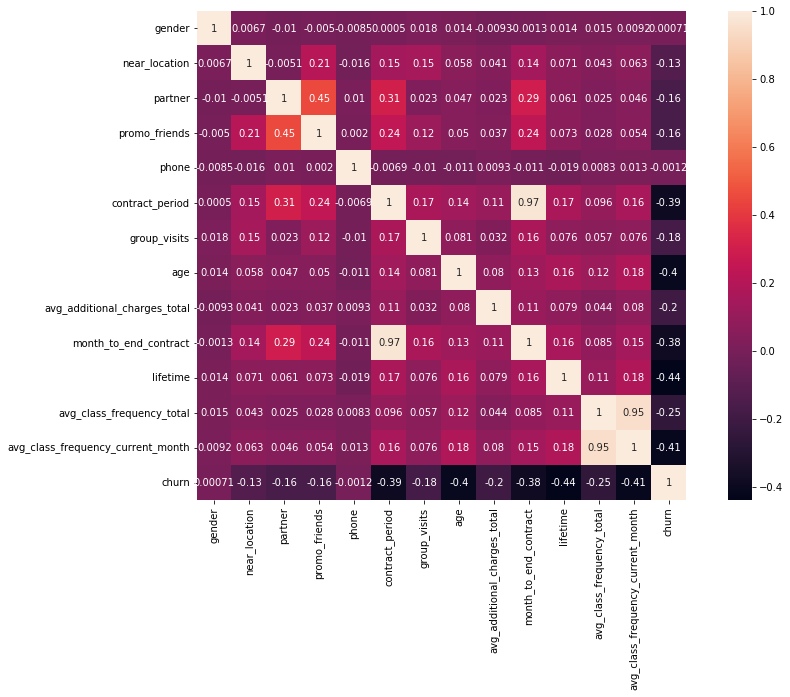

In [9]:
cm = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(cm, annot=True, square=True)
plt.show()

#### Conclusion:

Based on the heatmap plotting above, we can conclude that there's strong correlation between the  features and target variable (churn). The features avg_class_frequency_current_month and avg_class_frequency_total has a correlation of 0.95 which is strong positive correlation between the two variables. 

#### Step 3. Building a model to predict user churn

#### Dividing the data into train and validation sets using the train_test_split() function.

In [10]:
# divide the data into features (the X matrix) and a target variable (y)
y = df['churn']
X = df.drop(['churn'], axis = 1) 

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
# standardize the data using the StandardScaler method
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.fit_transform(X_train) 
X_test_st = scaler.transform(X_test)

print(X_train_st[:5])

X_test_st = scaler.transform(X_test)

print('Mean for standardized train', np.mean(X_train_st[:,0]))

[[-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  1.60502986
  -0.84769226  0.57944798  0.37161711  1.59173796  1.12734972  1.75580418
   1.61822807]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125  0.31628211 -0.81299073
  -0.84769226  0.27046055 -1.09697378 -0.79568246  5.88138322 -0.2239674
  -0.01340886]
 [ 0.98511083  0.4175068   1.03175391 -0.67567125  0.31628211  1.60502986
  -0.84769226 -0.65650171 -1.18374157  1.83048     0.3350108  -0.84308456
  -0.80541199]
 [-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  0.28610954
  -0.84769226 -0.96548914 -0.95158829  0.39802775  1.39146269  0.66771379
   0.64605224]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125 -3.16173427 -0.81299073
  -0.84769226 -0.03852687  0.97190435 -0.79568246  0.07089783 -0.19587934
  -0.16038147]]
Mean for standardized train 9.658940314238862e-17


#### Training the model on the train set with two methods:logistic regression and random forest

In [11]:
# defining the algorithm for the model 

# train your model
lr_model = LogisticRegression(random_state=42)
# use the trained model to make forecasts
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)

print('Model: ', lr_model)
print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('\tPrecision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('\tRecall: {:.2f}'.format(recall_score(y_test, lr_predictions)))

Model:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


In [21]:
# defining the algorithm for the model 

# train your model

rf_model = RandomForestClassifier(random_state=42)

# use the trained model to make forecasts
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)

print('Model: ', rf_model)
print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('\tPrecision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('\tRecall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Model:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
	Accuracy: 0.91
	Precision: 0.86
	Recall: 0.73


#### Conclusion:
We compared two models on the train set where the target feature is the customer train set: Logistic Regression and Random Forest Classifier.
The logistic regression has an accuracy of 0.92, a precision of 0.86, and a recall of 0.83. The randomforest model has an accuracy of 0.91, a precision of 0.86, and a recall of 0.73.
Accuracy is the share of accurate predictions among all predictions where the close to 1, the better. Here,Logistic Regression has a better score with .92
Likewise, Precision tells us what share of predictions in class 1 are true by looking at the share of correct answers only in the target class, where the close to 1 the better. Here, Logistic Regression has a better score with .85
Recall aims at minimizing the opposite risks by demonstrating the number of real class 1 objects you were able to discover with your model where the closer to 1, the better. Here, Logistic Regression has a better score with.73
There's not much of difference in accuracy and precision score. However, recall score is much higher for Logistic Regression. Hence, we can conclude that Logistic Regression model gave better results 


#### Step 4. Create user clusters

#### Set aside the column with data on churn and identify object (user) clusters

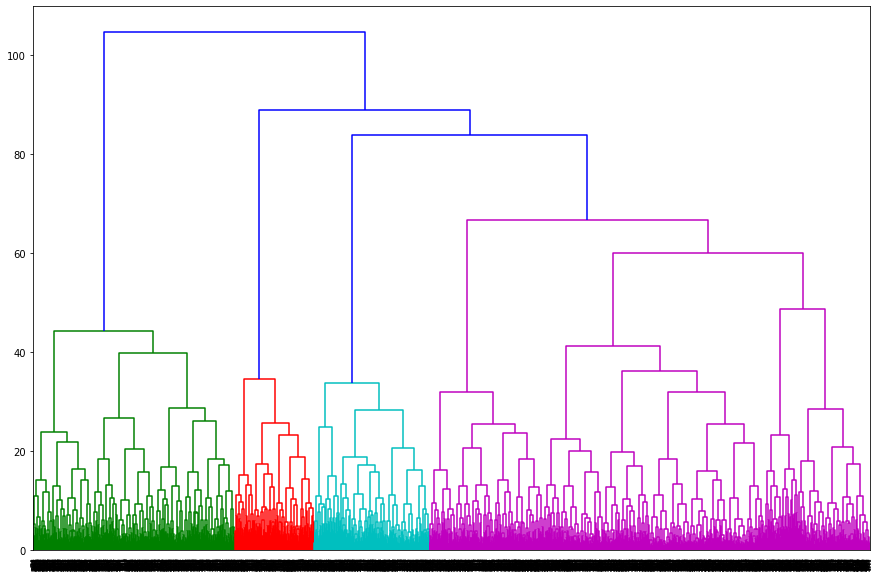

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_mean,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


In [12]:
# Standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(X)

# Build a matrix of distances based on the standardized feature matrix
linked = linkage(x_sc, method='ward')

# Plot a dendrogram
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.show()

# Train the clustering model with the K-means algorithm and predict customer clusters. 
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)

# calculate silhouette score
sil_score = silhouette_score(x_sc, labels)

# Look at the mean feature values for clusters
df['cluster_mean'] = labels

cluster_data = df.groupby('cluster_mean').mean()
display(cluster_data)

#### Conclusion:
The dendrogram shows there are 5 optimal clusters. Clusters 2 and 4 have the highest mean for near_location. 
Cluster 0 had the most partners.Cluster 2 had the most promo_friend.Cluster 1 contains users who do not have a phone number.  The average age in all the clusters are almost the same (around 29 years). Customers in cluster 0 has the longest contract (10 plus months) on average and they stay longer than the others, customers in cluster 3 has the least( about 2 months).The clusters with the smallest churn are 0 and 4 and gender is split equally.

#### Plot distributions of features for the clusters.

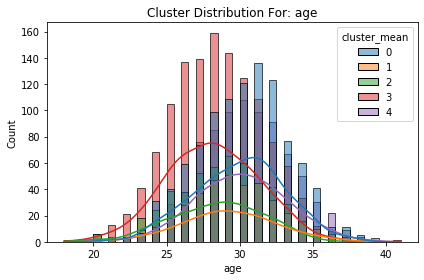

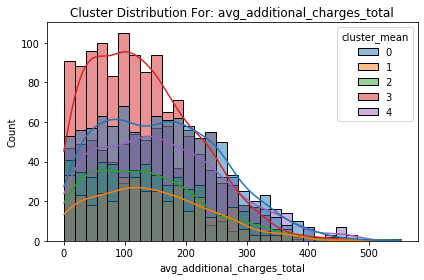

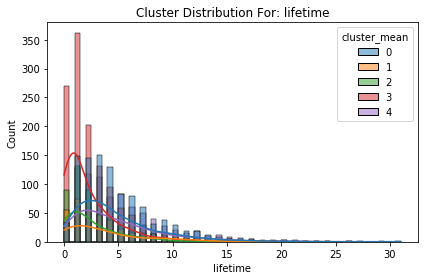

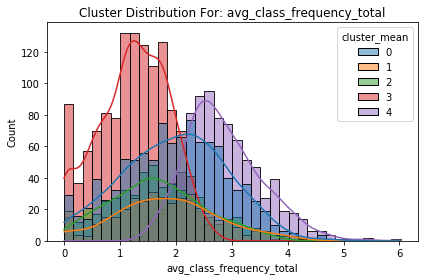

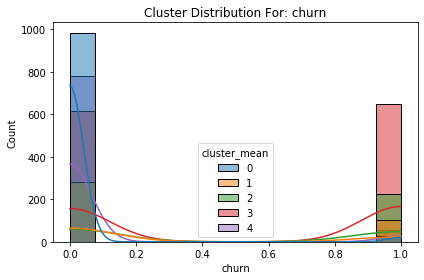

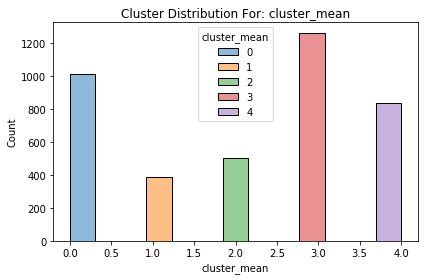

In [16]:
#selecting just  continuous variables
columns = df[['age', 'avg_additional_charges_total', 'lifetime',
               'avg_class_frequency_total', 'churn','cluster_mean']]


for i in columns:
   # plt.subplot(2,2,count)
    sns.histplot(data= columns, x= i, hue='cluster_mean', kde=True,palette="tab10")
    plt.title('Cluster Distribution For: {}'.format(str(i)))
    plt.tight_layout()
    plt.show()
    


#### Conclusion:

Based on the plotting above, the clusters based on age are approximately normally distributed around age 29 except cluster 3 which has a peak age above 30 years. 
Average additional charges and lifetime for the clusters are right skewed. Average class frequency total is approximately normally distributed for all clusters.





#### Calculate the churn rate for each cluster . 

In [17]:
#Do they differ in terms of churn rate? Which clusters are prone to leaving, 
#and which are loyal?

cluster_churn = df.query('churn ==1')
(cluster_churn.groupby('cluster_mean')['churn'].count()/df.groupby('cluster_mean')['churn'].count())\
.reset_index().rename(columns={'cluster_mean': 'clusters', 'churn': 'churn rate'})
                       
                       

,clusters,churn rate
0,0,0.027695
1,1,0.267532
2,2,0.443564
3,3,0.514263
4,4,0.068100


#### Conclusion:
Based on the table above,the churn rates do differ. Clusters 3 and 4 are more prone to leaving, clusters 1 and 2 are more loyal.

#### Making Churn Prediction

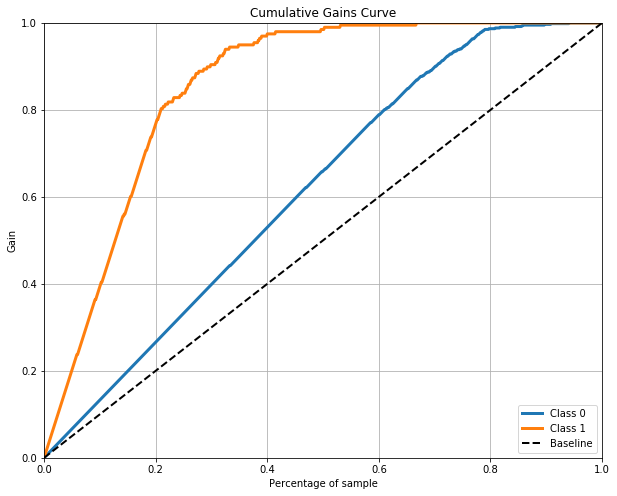

In [18]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_cumulative_gain(y_test, lr_probabilities, figsize=(10,8))
plt.show()

#### Conclusion:

We compared the cumulative percentage of customer gain  with the cumulative percentage of sample customers in the gym across the groups. 

This describes the ‘gain’ in targeting a given percentage of the total number of customers using the highest modelled probabilities of responding, rather than targeting them at random.
Targeting the top 40% of the customers, we would capture about 95% of clients who would churn.

#### Overall Conclusion:

Based on the observations above, we can recommend few things to improve their customer retention strategy.
We should focus on customers who live near a gym location or have employees at a partner company to acquire more customers. The customers between the ages of 27 and 34 years tends to go to gym. The data and graphs show that customers who fall under one (who stay) have all of these categories and less likely to churn.

For customers retention, we should focus on attaining their phone numbers by giving notifications and sending reminders to make them come back to the gym, encourage them to spend more money on other gym services and increase their amount of weekly visits. These are all factors that make a customer less likely to churn. 

Additionally, focus on customers who have 1-2 months before their current contract ends. This is when customers are more likely to decide whether to continue their subscription or not.

For example, the gym chain can attract customers by introducing free weight-loss program, personal fitness coach, keeping longer opening hours and discounted prices on additional services like swimming lessons, spa and massage.
